In [83]:
from src.models.jelly import BaseJellyNet, SpikingMNET10
import torch
from torchvision.datasets import MNIST
import numpy as np
from torchvision.transforms import Compose, ToTensor
from PIL import Image
import matplotlib.pyplot as plt

model = SpikingMNET10((1, 224, 224), 4, 5, encoding_method='poisson')

N = 12
img = Image.open('./figures/test_image.png')
transform = Compose([
    ToTensor(),
])
x = transform(img)
x = x.unsqueeze(0).repeat(N, 1, 1, 1, 1)
x = model.encoder(x)
print('Shape : {}'.format(x.shape))

Shape : torch.Size([12, 1, 1, 256, 256])


In [90]:
w, h = 256, 256

superposition = torch.full((w, h), 0, dtype=torch.float)
superposition_ = torch.full((5, w, h), 0, dtype=torch.float)

for t in range(N):
    superposition += x[t][0][0]
    if t == 0 or t == 2 or t == 5 or t == 7 or t == 11:
        superposition_[int((t + 1) / (N / 4))] = superposition

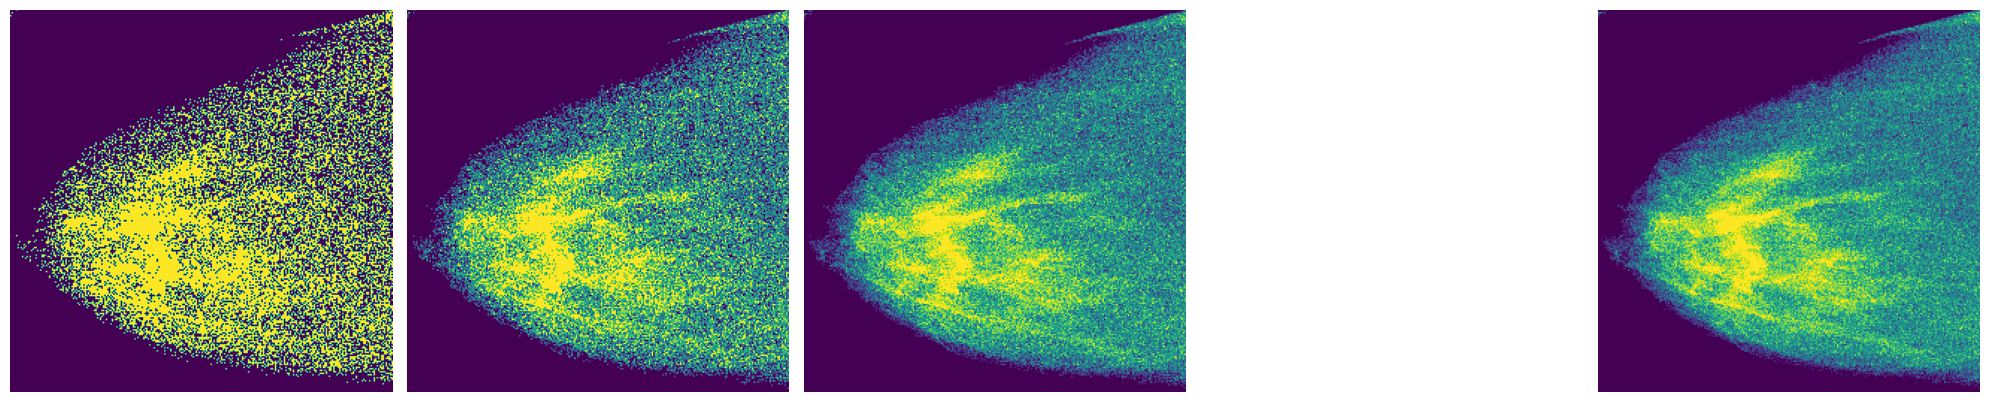

In [91]:
for i in range(5):
    min_ = superposition_[i].min()
    max_ = superposition_[i].max()
    superposition_[i] = (superposition_[i] - min_) / (max_ - min_)

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, img in zip(axes, superposition_):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()